My Year on Spotify

In [214]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


df = pd.read_csv('../data/streaming_history.csv')
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-05-25 05:57,Fobia,Vivo,2834
1,2021-05-25 05:57,T.M.Revolution,HEART OF SWORD 〜夜明け前〜,7401
2,2021-05-25 05:57,T.M.Revolution,HEART OF SWORD 〜夜明け前〜,244333
3,2021-05-25 06:03,Night Tempo,Stay with Me - Night Tempo Showa Groove Mix,341746
4,2021-05-25 07:03,Disclosure,Latch,90976


In [215]:
# rename columns
df = df.rename(columns={"endTime": "date", "msPlayed": "timePlayed"})
df.head()

,date,artistName,trackName,timePlayed
0,2021-05-25 05:57,Fobia,Vivo,2834
1,2021-05-25 05:57,T.M.Revolution,HEART OF SWORD 〜夜明け前〜,7401
2,2021-05-25 05:57,T.M.Revolution,HEART OF SWORD 〜夜明け前〜,244333
3,2021-05-25 06:03,Night Tempo,Stay with Me - Night Tempo Showa Groove Mix,341746
4,2021-05-25 07:03,Disclosure,Latch,90976


In [216]:
df["date"] = pd.to_datetime(df["date"])
df["date"]  = df["date"].dt.floor('d')
df.head()

,date,artistName,trackName,timePlayed
0,2021-05-25,Fobia,Vivo,2834
1,2021-05-25,T.M.Revolution,HEART OF SWORD 〜夜明け前〜,7401
2,2021-05-25,T.M.Revolution,HEART OF SWORD 〜夜明け前〜,244333
3,2021-05-25,Night Tempo,Stay with Me - Night Tempo Showa Groove Mix,341746
4,2021-05-25,Disclosure,Latch,90976


In [217]:
df['timePlayed'] = pd.to_timedelta(df['timePlayed'], unit='ms')
df['timePlayed'] = df['timePlayed'].dt.total_seconds() / 60
df.head()

,date,artistName,trackName,timePlayed
0,2021-05-25,Fobia,Vivo,0.047233
1,2021-05-25,T.M.Revolution,HEART OF SWORD 〜夜明け前〜,0.123350
2,2021-05-25,T.M.Revolution,HEART OF SWORD 〜夜明け前〜,4.072217
3,2021-05-25,Night Tempo,Stay with Me - Night Tempo Showa Groove Mix,5.695767
4,2021-05-25,Disclosure,Latch,1.516267


In [218]:
by_date = df.groupby("date")[["trackName"]].count()
by_date = by_date.sort_index()

In [219]:
by_date["weekday"] = pd.Index(by_date.index.isocalendar().day)
by_date["week"] = pd.Index(by_date.index.isocalendar().week)

by_date.head()

,trackName,weekday,week
date,,,
2021-05-25,75,2,21
2021-05-26,62,3,21
2021-05-27,217,4,21
2021-05-28,177,5,21
2021-05-29,41,6,21


Ahora vamos a convertir la columna Week en un conteo, es decir, que la semana 2021-05-25 ya no será la semana 21 (del año) sino que para nosotros será la semana 0 (desde donde iniciamos), luego la semana 22 será nuestra semana 1, y así sucesivamente...

In [220]:
week = 0
prev_week = by_date.iloc[0]["week"]
continuous_week = np.zeros(len(by_date)).astype(int)
for i, (_, row) in enumerate(by_date.iterrows()):
    if row["week"] != prev_week:
        week += 1
        prev_week = row["week"]
    continuous_week[i] = week
by_date["continuous_week"] = continuous_week
by_date.head(10)

,trackName,weekday,week,continuous_week
date,,,,
2021-05-25,75,2,21,0
2021-05-26,62,3,21,0
2021-05-27,217,4,21,0
2021-05-28,177,5,21,0
2021-05-29,41,6,21,0
2021-05-30,81,7,21,0
2021-05-31,114,1,22,1
2021-06-01,59,2,22,1
2021-06-02,123,3,22,1


El siguiente paso es preparar, con NumPy, una matriz de tamaño días ✕ semanas en donde cada una de las entradas será la cantidad de canciones que escuchamos en ese día, de esa semana:

In [221]:
songs = np.full((7, continuous_week.max() + 1), np.nan)


for index, row in by_date.iterrows():
    # tenemos los dias de la semana de 1 a 7
    # pero los indices del array songs van del 0 al 6
    # vamo a bajarle 1
    day = row["weekday"] - 1
    week = row["continuous_week"]
    # enviar el numero de reproduciones a la posicion day x week
    songs[day][week] = row["trackName"]


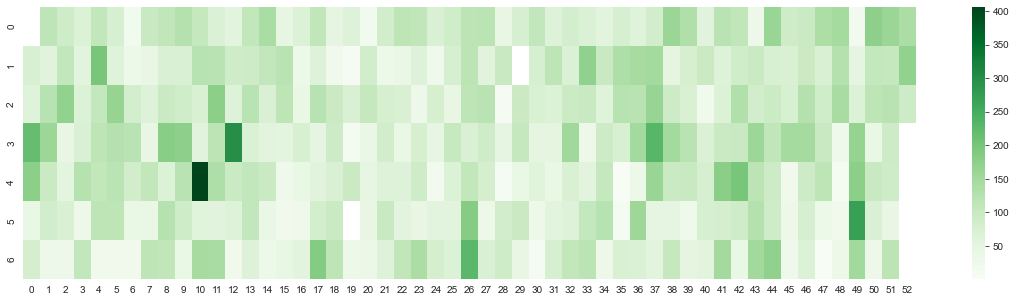

In [222]:
# vamos a graficar la matrix songs
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot()
mask = np.isnan(songs)

sns.heatmap(songs, ax = ax, cmap="Greens")
plt.show()

Hubo un dia donde escuché **¡¡400 canciones!!** Seguro me quede dormida con Alexa encendida...

Vamo' a poner bonito!! (A continuación es copy/paste de los magos de Tacos de datos)

In [238]:
min_date = df["date"].min()
first_monday = min_date - timedelta(min_date.weekday())
months = [first_monday + timedelta(weeks=wk) for wk in range(continuous_week.max())]

x_labels = [calendar.month_abbr[months[0].month]]
x_labels.extend([
    calendar.month_abbr[months[i].month] \
    if months[i-1].month != months[i].month else "" for i in range(len(months))
])

y_labels = ["Mon", "", "Wed", "", "Fri", "", "Sun"]

Continua la _grafimagia_...

[Text(0.5, 1, 'May'),
 Text(1.5, 1, ''),
 Text(2.5, 1, ''),
 Text(3.5, 1, 'Jun'),
 Text(4.5, 1, ''),
 Text(5.5, 1, ''),
 Text(6.5, 1, ''),
 Text(7.5, 1, 'Jul'),
 Text(8.5, 1, ''),
 Text(9.5, 1, ''),
 Text(10.5, 1, ''),
 Text(11.5, 1, 'Aug'),
 Text(12.5, 1, ''),
 Text(13.5, 1, ''),
 Text(14.5, 1, ''),
 Text(15.5, 1, ''),
 Text(16.5, 1, 'Sep'),
 Text(17.5, 1, ''),
 Text(18.5, 1, ''),
 Text(19.5, 1, ''),
 Text(20.5, 1, 'Oct'),
 Text(21.5, 1, ''),
 Text(22.5, 1, ''),
 Text(23.5, 1, ''),
 Text(24.5, 1, 'Nov'),
 Text(25.5, 1, ''),
 Text(26.5, 1, ''),
 Text(27.5, 1, ''),
 Text(28.5, 1, ''),
 Text(29.5, 1, 'Dec'),
 Text(30.5, 1, ''),
 Text(31.5, 1, ''),
 Text(32.5, 1, ''),
 Text(33.5, 1, 'Jan'),
 Text(34.5, 1, ''),
 Text(35.5, 1, ''),
 Text(36.5, 1, ''),
 Text(37.5, 1, ''),
 Text(38.5, 1, 'Feb'),
 Text(39.5, 1, ''),
 Text(40.5, 1, ''),
 Text(41.5, 1, ''),
 Text(42.5, 1, 'Mar'),
 Text(43.5, 1, ''),
 Text(44.5, 1, ''),
 Text(45.5, 1, ''),
 Text(46.5, 1, 'Apr'),
 Text(47.5, 1, ''),
 Text(48.5, 1,

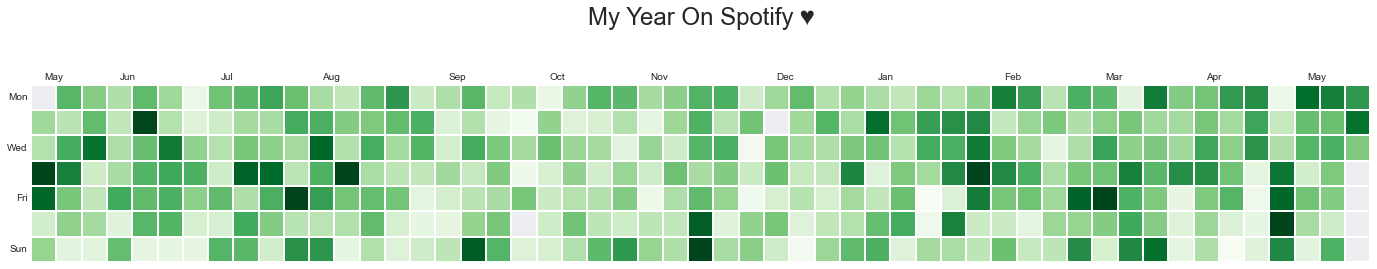

In [240]:
fig = plt.figure(figsize=(24, 6))
ax = plt.subplot()

ax.set_title("My Year On Spotify ♥", fontsize=24, pad=60)
ax.xaxis.tick_top()
ax.tick_params(axis="both", which="both", length=0)
ax.set_facecolor("#ebedf0")
fig.patch.set_facecolor('white')

sns.heatmap(
    songs, linewidths=2, linecolor="white", square=True, mask=np.isnan(songs), cmap="Greens", vmin=0, vmax=200, cbar=False, ax=ax)

ax.set_yticklabels(y_labels, rotation=0)
ax.set_xticklabels(x_labels, ha="left")


> “El arte de la música es el que más cercano se halla de las lágrimas y los recuerdos”